In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %load ../../loaders/imports.py
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb

# Add the uoicorr directory to the path
sys.path.append('../../../uoicorr_run')

# Add the root directory of this repository
sys.path.append('../..')

from dchisq import DChiSq

In [172]:
dx2 = DChiSq(0.3, 0.1, 5000, 500)
p = dx2.nPDF(np.linspace(1200, 1800, 200))

In [177]:
c = dx2.nCDF(np.linspace(1200, 1800, 200))

In [164]:
# Compare to Monte Carlo
n_samples = int(1e7)
samples = np.zeros(n_samples)
for i in range(n_samples):
    
    samples[i] = 0.3 * np.random.chisquare(5000) - 0.1 * np.random.chisquare(500)

In [165]:
np.mean(samples)

1449.9975674139332

(array([3.04989262e-07, 2.77509107e-05, 6.41526241e-04, 4.75141527e-03,
        1.17812497e-02, 1.02700435e-02, 3.24918443e-03, 3.82525002e-04,
        1.70202681e-05, 3.32998480e-07]),
 array([1293.15232777, 1325.28460654, 1357.41688531, 1389.54916408,
        1421.68144285, 1453.81372162, 1485.94600038, 1518.07827915,
        1550.21055792, 1582.34283669, 1614.47511546]),
 <a list of 10 Patch objects>)

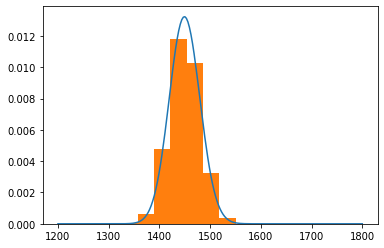

In [176]:
plt.plot(np.linspace(1200, 1800, 200), p)
plt.hist(samples, density=True)

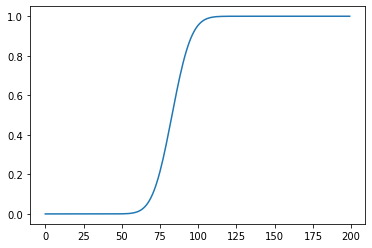

In [178]:
plt.plot(c)

In [184]:
# Concentration of measure phenomenon, logarithmic scaling:

p = np.logspace(2, 5, 10)
T = np.log(p)
n = p

n_samples = 200

pdfs = np.zeros((p.size, n_samples))
means = np.zeros(p.size)
variances = np.zeros(p.size)
    
for i, p_ in enumerate(p):
    
    dx2 = DChiSq(0.5, 0.5, n[i] - T[i], T[i])
    means[i] = dx2.mean()
    variances[i] = dx2.variance()    
    
    domain = np.linspace(dx2.mean() - np.sqrt(dx2.variance()), dx2.mean() + np.sqrt(dx2.variance()), n_samples)
    pdfs[i, :] = dx2.nPDF(domain)
    

In [187]:
variances

array([5.49136783e+01, 1.41080865e+02, 3.51542310e+02, 8.57504774e+02,
       2.05962342e+03, 4.88959761e+03, 1.15023217e+04, 2.68583884e+04,
       6.23302110e+04, 1.43895000e+05])

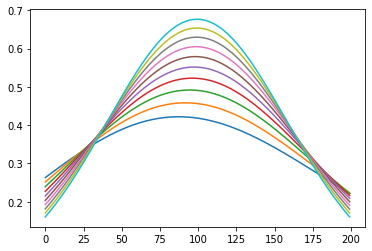

In [188]:
# Plot the Z-scored PDFs ??:
for i in range(pdfs.shape[0]):
    
    plt.plot(pdfs[i, :] * np.sqrt(variances[i]))
    

In [38]:
from scipy import stats

In [48]:
# Exponential tail bounds: Evaluate the PDF far from the mean relative to a Gaussian and an exponential with 
# the same variance. Does our distribution fall somewhere in the middle?

alpha = 0.33
beta = 2

m = 1000
n = 100

mean = alpha * m - beta * n
variance = 2 * (m * alpha**2 + n * beta**2)

dx2 = DChiSq(alpha, beta, m, n)

domain = np.linspace(mean - 5 * variance, mean - 3 * variance, 200)
#p1 = dx2.nPDF(domain)

p2 = stats.norm.pdf(domain, loc= mean, scale = np.sqrt(variance))
p3 = stats.laplace.pdf(domain, loc = mean, scale = np.sqrt(variance))

In [73]:
mean

130.0

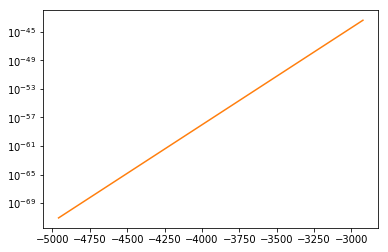

In [51]:
plt.plot(domain, p2)
plt.plot(domain, p3)
plt.yscale('log')

In [3]:
import mpmath as mp

In [64]:
# Plot the characteristic function so we know what we are dealing with

char_fn = list(map(dx2.char_fn, np.linspace(-1, 1, 1000)))

In [65]:
char_fn

[mpc(real='6.6663577316501231e-71', imag='6.85091486485076e-71'),
 mpc(real='4.6767681804640708e-71', imag='1.3440151303232242e-70'),
 mpc(real='-2.1672111194494931e-71', imag='2.1072444214194872e-70'),
 mpc(real='-1.6219727249531928e-70', imag='2.7039847688656245e-70'),
 mpc(real='-3.8938973825247933e-70', imag='2.6196097339946073e-70'),
 mpc(real='-6.9024312630124931e-70', imag='1.0675097315627972e-70'),
 mpc(real='-9.9723712768147385e-70', imag='-2.9301834928995532e-70'),
 mpc(real='-1.1571720608962305e-69', imag='-1.0261998666559468e-69'),
 mpc(real='-9.0706192486365968e-70', imag='-2.1149855075913458e-69'),
 mpc(real='1.2147403552445771e-70', imag='-3.4216956688889755e-69'),
 mpc(real='2.3366838498023499e-69', imag='-4.5259917331188907e-69'),
 mpc(real='6.0198193913978367e-69', imag='-4.6014215934785795e-69'),
 mpc(real='1.1021341502620838e-68', imag='-2.3560787585321861e-69'),
 mpc(real='1.6313898994656927e-68', imag='3.8524748205319815e-69'),
 mpc(real='1.9464494683817253e-68', 

In [81]:
x = list(map(lambda t: mp.fabs(dx2.char_fn(t)), np.linspace(-1, 1, 1000)))

In [83]:
thresh = [xx < mp.mpf(1e-50) for xx in x]

In [84]:
thresh

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False

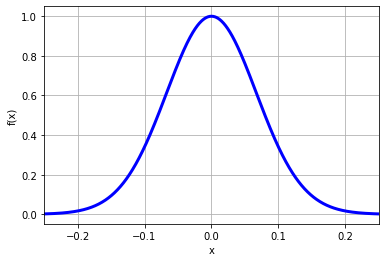

In [127]:
mp.plot(lambda t: mp.fabs(dx2.char_fn(t)), [-0.25, 0.25], points=1000)

In [85]:
dx2 = DChiSq(1, 1, 100, 10)

In [197]:
np.sqrt(dx2.variance())

44.721359549995796

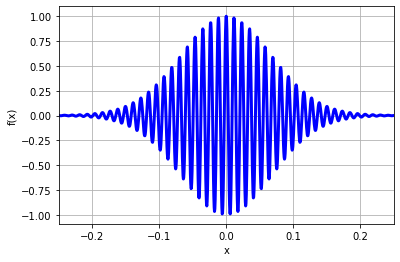

In [128]:
# Plot the integrand of the inversion formula
z = 90 + 540
mp.plot(lambda t: mp.re(mp.exp(-1j * t * z) * dx2.char_fn(t)), [-0.25, 0.25], points=1000, file='charfntail.pdf')

In [68]:
cf = lambda t: mp.re(mp.exp(-1j * t * z) * dx2.char_fn(t))

In [78]:
cf0 = list(map(lambda t: mp.re(mp.exp(-1j * t * z) * dx2.char_fn(t)), np.linspace(-0.25, 0.25, 1000)))

In [91]:
partpnts.size

43

In [ ]:
# when does naive quadrature really start to break down? Use this to inform the delineation of different
# integration strategies

In [95]:
domain = np.linspace(dx2.mean(), dx2.mean() - 5 * np.sqrt(dx2.variance()), 250)
p = dx2.nPDF(domain)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


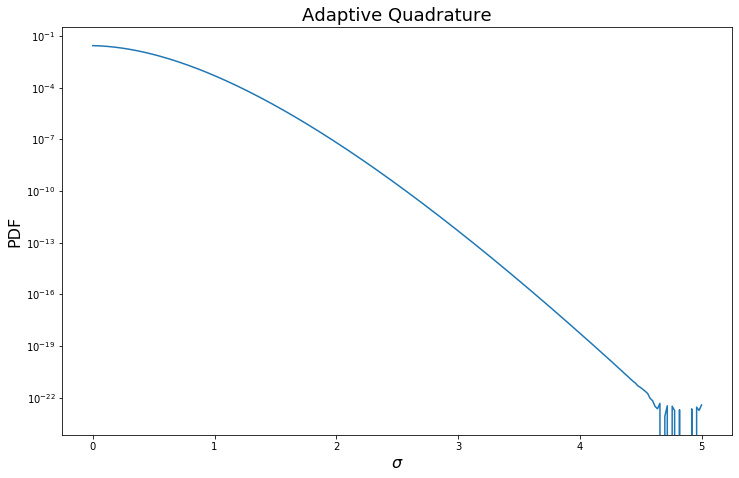

In [129]:
fig, ax = plt.subplots(figsize = (12, 7.5))
ax.plot((domain - dx2.mean())/np.sqrt(dx2.variance()), p)
plt.yscale('log')
ax.set_title('Adaptive Quadrature', fontsize = 18)
ax.set_ylabel('PDF', fontsize = 16)
ax.set_xlabel(r'$\sigma$', fontsize = 16)
fig.savefig('QuadErrorCorrected.pdf', bbox_inches='tight', pad_inches=0)

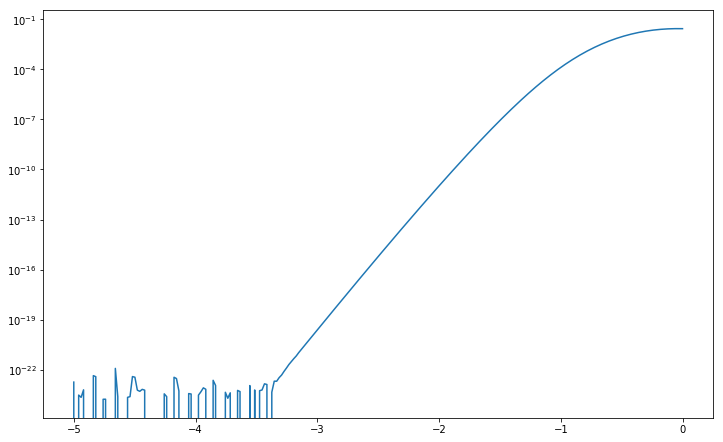

In [96]:
fig, ax = plt.subplots(figsize = (12, 7.5))
ax.plot((domain - dx2.mean())/np.sqrt(dx2.variance()), p)
plt.yscale('log')

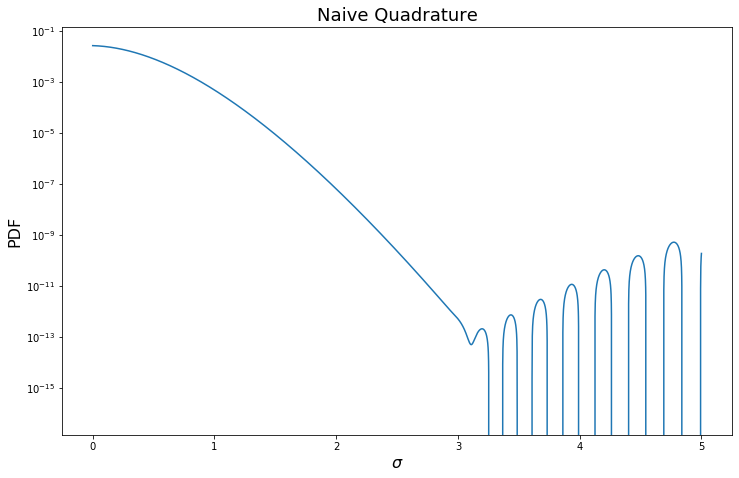

In [220]:
fig, ax = plt.subplots(figsize = (12, 7.5))
ax.plot((domain - dx2.mean())/np.sqrt(dx2.variance()), p)
plt.yscale('log')
ax.set_title('Naive Quadrature', fontsize = 18)
ax.set_ylabel('PDF', fontsize = 16)
ax.set_xlabel(r'$\sigma$', fontsize = 16)
fig.savefig('QuadError.pdf', bbox_inches='tight', pad_inches=0)

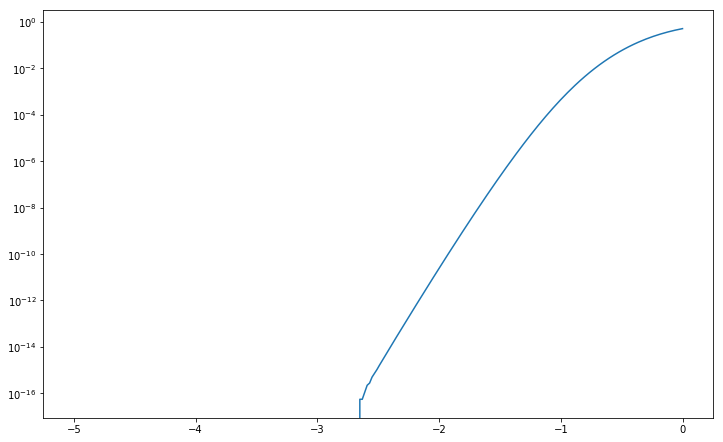

In [102]:
fig, ax = plt.subplots(figsize = (12, 7.5))
ax.plot((domain - dx2.mean())/np.sqrt(dx2.variance()), p)
plt.yscale('log')

In [104]:
domain

array([  90.        ,   89.10198073,   88.20396146,   87.3059422 ,
         86.40792293,   85.50990366,   84.61188439,   83.71386512,
         82.81584586,   81.91782659,   81.01980732,   80.12178805,
         79.22376878,   78.32574952,   77.42773025,   76.52971098,
         75.63169171,   74.73367244,   73.83565317,   72.93763391,
         72.03961464,   71.14159537,   70.2435761 ,   69.34555683,
         68.44753757,   67.5495183 ,   66.65149903,   65.75347976,
         64.85546049,   63.95744123,   63.05942196,   62.16140269,
         61.26338342,   60.36536415,   59.46734489,   58.56932562,
         57.67130635,   56.77328708,   55.87526781,   54.97724855,
         54.07922928,   53.18121001,   52.28319074,   51.38517147,
         50.4871522 ,   49.58913294,   48.69111367,   47.7930944 ,
         46.89507513,   45.99705586,   45.0990366 ,   44.20101733,
         43.30299806,   42.40497879,   41.50695952,   40.60894026,
         39.71092099,   38.81290172,   37.91488245,   37.01686

In [ ]:
1/mp.pi

In [105]:
# CDF
domain = np.linspace(dx2.mean(), dx2.mean() - 5 * np.sqrt(dx2.variance()), 250)
p = dx2.nCDF(domain)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
> /home/akumar/nse/uoicorr_analysis/dchisq.py(345)nCDF()
-> p[i] = float(1/2 - 1/mp.pi * I)
(Pdb) I
mpf('1.5707963267948966')
(Pdb) 1/mpi * I
*** NameError: name 'mpi' is not defined
(Pdb) 1/mp.pi * I
mpf('0.5')
(Pdb) quit()


BdbQuit: 

In [26]:
domain = np.linspace(dx2.mean(), dx2.mean() + 4 * np.sqrt(dx2.variance()), 1000)

In [43]:
# Now compare to the use of asymptotic expansion for > 2 sigma
dx2 = DChiSq(1, 1, 100, 10)
p2 = dx2.nPDF(domain)

/home/akumar/anaconda3/envs/nse/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  after removing the cwd from sys.path.


Text(0.5, 0, '$\\sigma$')

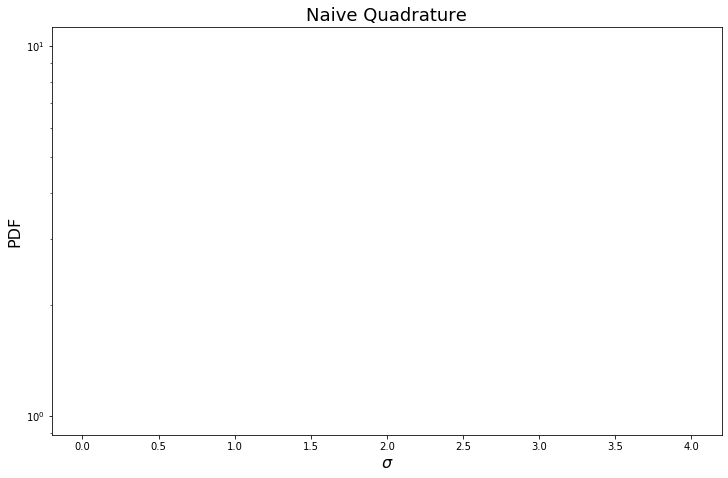

In [36]:
fig, ax = plt.subplots(figsize = (12, 7.5))
#ax.plot((domain - dx2.mean())/np.sqrt(dx2.variance()), p)
ax.plot((domain - dx2.mean())/np.sqrt(dx2.variance()), p2)
plt.yscale('log')
ax.set_title('Naive Quadrature', fontsize = 18)
ax.set_ylabel('PDF', fontsize = 16)
ax.set_xlabel(r'$\sigma$', fontsize = 16)
#fig.savefig('QuadError.pdf', bbox_inches='tight', pad_inches=0)

In [134]:
# Demonstrate the saturation effect in the CDF
domain = np.linspace(dx2.mean() - 5 * np.sqrt(dx2.variance()), dx2.mean(), 250)
c = dx2.nCDF(domain)

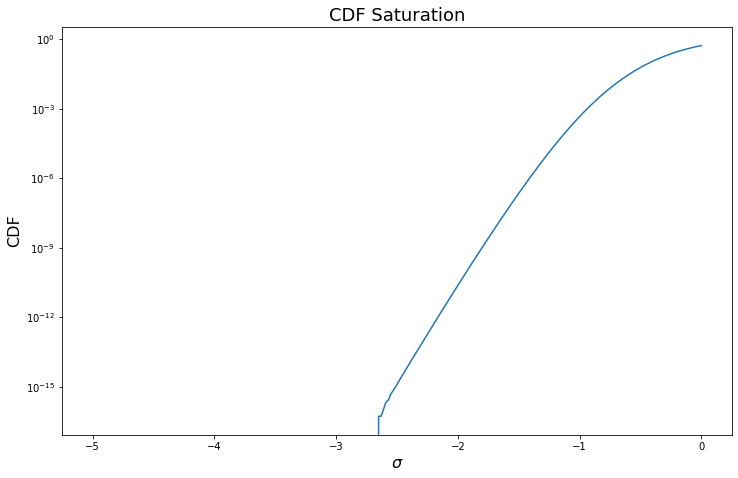

In [135]:
fig, ax = plt.subplots(figsize = (12, 7.5))
ax.plot((domain - dx2.mean())/np.sqrt(dx2.variance()), c)
plt.yscale('log')
ax.set_title('CDF Saturation', fontsize = 18)
ax.set_ylabel('CDF', fontsize = 16)
ax.set_xlabel(r'$\sigma$', fontsize = 16)
fig.savefig('CDFerror.pdf', bbox_inches='tight', pad_inches=0)

In [ ]:
# Do MDL and empirical bayes show convergence as we increase n? I.e. generate data from increasingly larger 
# regression problems and calculate the prior parameters

# (1) Vary the sparsity of the model in 3 regimes (no scaling, log scaling, linear scaling)